# Calculate Price Elasticity of Demand

In [3]:
import pandas as pd
import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
def calculate_ped(group):
    X = sm.add_constant(group['sell_price'])
    model = sm.OLS(group['sold'], X).fit()
    price_coef = model.params['sell_price']
#     mean_sellprice = np.mean(group['sell_price'])
#     mean_quantity = np.mean(group['sold'])
#     ped = price_coef * (mean_sellprice / mean_quantity)
    return price_coef

In [272]:
def calculate_ped(group):
    X = sm.add_constant(group['sell_price'])
    model = sm.OLS(group['sold'], X).fit()
    price_coef = model.params['sell_price']
    return price_coef

In [204]:
def calculate_ped3(data_df):
    # Calculate the percentage change in quantity demanded
    data_df['percentage_change_quantity'] = data_df['sold'].pct_change() * 100

    # Calculate the percentage change in price
    data_df['percentage_change_price'] = data_df['sell_price'].pct_change() * 100

#     # Calculate the average price
#     data_df['average_price'] = (data_df['sell_price'].shift(1) + data_df['sell_price']) / 2
    
#     # Calculate the average quantity demanded
#     data_df['average_quantity'] = (data_df['quantity'].shift(1) + data_df['quantity']) / 2
    
    # Calculate the price elasticity of demand (PED)
#     data_df['PED'] = data_df['percentage_change_quantity'] / data_df['percentage_change_price']
    
    return data_df

In [250]:
def ped(df):
    df['PED'] = ((df['sold'].diff() / ((df['sold'] + df['sold'].shift(-1)) / 2)) /
             (df['sell_price'].diff() / ((df['sell_price'] + df['sell_price'].shift(-1)) / 2)))
    return df

In [223]:
def ped(data_df):
    data_df['PED'] = data_df['percentage_change_quantity'] / data_df['percentage_change_price']
    return data_df

## Calculate PED for hobbies items

In [5]:
hobbies_df = pd.read_csv('hobbies_df.csv')
hobbies_df =hobbies_df.drop(hobbies_df.columns[0],axis=1)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
hobbies_df = hobbies_df.dropna(subset = ['sell_price'])

In [8]:
hobbies_df.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.46
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.56
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,3.17
11,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,5.98
14,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.70


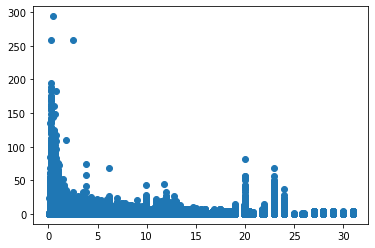

<Figure size 720x432 with 0 Axes>

In [126]:
# To get a rough idea of relationship between price and quantity
# We can see the distribution of price and quantity
# when price is low, quantity sold is higher
plt.scatter(hobbies_df['sell_price'],hobbies_df['sold'])
plt.figure(figsize=(10, 6))
plt.show()

In [21]:
# How each specific food items react to price changes.
# Ex: apple in Mcity.
sum_ped_id_hobbies = hobbies_df.groupby(['id','wm_yr_wk']).agg({'sold': 'sum', 'sell_price': 'mean'}).reset_index()
print(sum_ped_id_hobbies)

                                    id  wm_yr_wk  sold  sell_price
0        HOBBIES_1_001_CA_1_validation     11325     1        9.58
1        HOBBIES_1_001_CA_1_validation     11326     0        9.58
2        HOBBIES_1_001_CA_1_validation     11327     2        8.26
3        HOBBIES_1_001_CA_1_validation     11328     2        8.26
4        HOBBIES_1_001_CA_1_validation     11329     6        8.26
...                                ...       ...   ...         ...
1238700  HOBBIES_2_149_WI_3_validation     11609     0        0.97
1238701  HOBBIES_2_149_WI_3_validation     11610     1        0.97
1238702  HOBBIES_2_149_WI_3_validation     11611     1        0.97
1238703  HOBBIES_2_149_WI_3_validation     11612     2        0.97
1238704  HOBBIES_2_149_WI_3_validation     11613     0        0.97

[1238705 rows x 4 columns]


In [280]:
# Group by 'id' and 'wm_yr_wk', and aggregate 'sold' with sum and 'sell_price' with mean
sum_sold_mean_price = hobbies_df.groupby(['item_id', 'wm_yr_wk']).agg({'sold': 'sum', 'sell_price': 'mean'}).reset_index()

# Sort the DataFrame by 'wm_yr_wk' to ensure consecutive weeks
sum_sold_mean_price.sort_values(by='wm_yr_wk', inplace=True)

# Assign group numbers for every 4 weeks
group_size = 12
sum_sold_mean_price['4_week_group'] = sum_sold_mean_price.groupby('item_id')['wm_yr_wk'].transform(lambda x: (x.rank(method='dense') - 1) // group_size)

# Group by 'id' and '4_week_group', and aggregate 'sold' with sum and 'sell_price' with mean
sum_sold_mean_price_4_weeks = sum_sold_mean_price.groupby(['item_id', '4_week_group']).agg({'sold': 'sum', 'sell_price': 'mean'}).reset_index()

# Rename the columns for clarity
sum_sold_mean_price_4_weeks.columns = ['item_id', '4_week_group', 'sold', 'sell_price']

In [281]:
sum_sold_mean_price_4_weeks[sum_sold_mean_price_4_weeks['item_id'] == 'HOBBIES_1_001'].head(50)

,item_id,4_week_group,sold,sell_price
0,HOBBIES_1_001,0.0,224,8.577333
1,HOBBIES_1_001,1.0,353,8.318000
2,HOBBIES_1_001,2.0,299,8.299000
3,HOBBIES_1_001,3.0,274,8.283000
4,HOBBIES_1_001,4.0,304,8.279000
5,HOBBIES_1_001,5.0,283,8.272000
6,HOBBIES_1_001,6.0,322,8.272000
7,HOBBIES_1_001,7.0,339,8.272000
8,HOBBIES_1_001,8.0,367,8.244833
9,HOBBIES_1_001,9.0,385,8.272000


In [253]:
try_1a = calculate_ped3(sum_sold_mean_price_4_weeks)

In [208]:
try_1a

,item_id,4_week_group,sold,sell_price,percentage_change_quantity,percentage_change_price
0,HOBBIES_1_001,0.0,48,8.969,NaN,NaN
1,HOBBIES_1_001,1.0,84,8.431,75.000000,-5.998439e+00
2,HOBBIES_1_001,2.0,92,8.332,9.523810,-1.174238e+00
3,HOBBIES_1_001,3.0,109,8.332,18.478261,0.000000e+00
4,HOBBIES_1_001,4.0,127,8.314,16.513761,-2.160346e-01
...,...,...,...,...,...,...
32109,HOBBIES_2_149,35.0,147,0.970,-33.783784,0.000000e+00
32110,HOBBIES_2_149,36.0,178,0.970,21.088435,0.000000e+00
32111,HOBBIES_2_149,37.0,99,0.970,-44.382022,0.000000e+00
32112,HOBBIES_2_149,38.0,105,0.970,6.060606,0.000000e+00


In [300]:
try_1a_hobbies = sum_sold_mean_price_4_weeks[sum_sold_mean_price_4_weeks['item_id'] == 'HOBBIES_1_003']
try_1a_hobbies

,item_id,4_week_group,sold,sell_price
36,HOBBIES_1_003,0.0,102,2.913611
37,HOBBIES_1_003,1.0,82,2.997778
38,HOBBIES_1_003,2.0,112,2.951481
39,HOBBIES_1_003,3.0,67,2.970000
40,HOBBIES_1_003,4.0,130,2.970000
41,HOBBIES_1_003,5.0,170,2.970000
42,HOBBIES_1_003,6.0,180,2.970000
43,HOBBIES_1_003,7.0,183,2.970000
44,HOBBIES_1_003,8.0,242,2.970000
45,HOBBIES_1_003,9.0,167,2.970000


In [260]:
import numpy as np

In [301]:
try_1a_hobbies['sold'] = np.log(try_1a_hobbies['sold'])
try_1a_hobbies['sell_price']= np.log(try_1a_hobbies['sell_price'])

/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_28554/2864487341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_1a_hobbies['sold'] = np.log(try_1a_hobbies['sold'])
/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_28554/2864487341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_1a_hobbies['sell_price']= np.log(try_1a_hobbies['sell_price'])


In [302]:
try_1a_hobbies

,item_id,4_week_group,sold,sell_price
36,HOBBIES_1_003,0.0,4.624973,1.069393
37,HOBBIES_1_003,1.0,4.406719,1.097871
38,HOBBIES_1_003,2.0,4.718499,1.082307
39,HOBBIES_1_003,3.0,4.204693,1.088562
40,HOBBIES_1_003,4.0,4.867534,1.088562
41,HOBBIES_1_003,5.0,5.135798,1.088562
42,HOBBIES_1_003,6.0,5.192957,1.088562
43,HOBBIES_1_003,7.0,5.209486,1.088562
44,HOBBIES_1_003,8.0,5.488938,1.088562
45,HOBBIES_1_003,9.0,5.117994,1.088562


In [292]:
df_ped = calculate_ped3(try_1a_hobbies)

/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_28554/1552724310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['percentage_change_quantity'] = data_df['sold'].pct_change() * 100
/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_28554/1552724310.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['percentage_change_price'] = data_df['sell_price'].pct_change() * 100


In [294]:
df_ped = df_ped[df_ped['percentage_change_price'] != 0]

In [296]:
df_ped = calculate_ped(df_ped)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [298]:
df_ped

-11.23571249712072

In [297]:
df_ped

-11.23571249712072

In [234]:
df = try_1a_hobbies.loc[ ~((try_1a_hobbies['percentage_change_price'] <= 0) & (try_1a_hobbies['percentage_change_quantity'] < 0))]

In [235]:
df = try_1a_hobbies.loc[~(try_1a_hobbies['percentage_change_price'] == 0)]

In [240]:
df

,item_id,4_week_group,sold,sell_price,percentage_change_quantity,percentage_change_price
0,HOBBIES_1_001,0.0,48,8.9690,NaN,NaN
1,HOBBIES_1_001,1.0,84,8.4310,75.000000,-5.998439
2,HOBBIES_1_001,2.0,92,8.3320,9.523810,-1.174238
4,HOBBIES_1_001,4.0,127,8.3140,16.513761,-0.216035
8,HOBBIES_1_001,8.0,113,8.2810,25.555556,-0.324988
10,HOBBIES_1_001,10.0,92,8.2840,-2.127660,0.036228
13,HOBBIES_1_001,13.0,119,8.2810,17.821782,-0.036214
25,HOBBIES_1_001,25.0,149,8.1905,79.518072,-0.985251
26,HOBBIES_1_001,26.0,135,8.2720,-9.395973,0.995055
36,HOBBIES_1_001,36.0,59,8.3440,-60.927152,0.687824


In [239]:
df = df.loc[ ~((df['percentage_change_price'] <= 0) & (df['percentage_change_quantity'] < 0))]

In [237]:
df = df.loc[ ~((df['percentage_change_price'] >= 0) & (df['percentage_change_quantity'] > 0))]

In [248]:
df_ped = ped(try_1a_hobbies)

/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_28554/3146585907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PED'] = ((df['sold'].diff() / ((df['sold'] + df['sold'].shift(-1)) / 2)) /


In [249]:
df_ped

,item_id,4_week_group,sold,sell_price,percentage_change_quantity,percentage_change_price,PED
0,HOBBIES_1_001,0.0,48,8.9690,NaN,NaN,NaN
1,HOBBIES_1_001,1.0,84,8.4310,75.000000,-5.998439,-6.373226
2,HOBBIES_1_001,2.0,92,8.3320,9.523810,-1.174238,-6.699432
3,HOBBIES_1_001,3.0,109,8.3320,18.478261,0.000000,inf
4,HOBBIES_1_001,4.0,127,8.3140,16.513761,-0.216035,-68.122951
5,HOBBIES_1_001,5.0,117,8.3080,-7.874016,-0.072167,130.015649
6,HOBBIES_1_001,6.0,96,8.3080,-17.948718,0.000000,-inf
7,HOBBIES_1_001,7.0,90,8.3080,-6.250000,0.000000,-inf
8,HOBBIES_1_001,8.0,113,8.2810,25.555556,-0.324988,-68.156379
9,HOBBIES_1_001,9.0,94,8.2810,-16.814159,0.000000,-inf


In [212]:
print(try_1a_hobbies[(try_1a_hobbies['percentage_change_price'] <= 0) & (try_1a_hobbies['percentage_change_quantity'] < 0)].shape[0])

15


In [129]:
# How each type of food item react to price changes.
# Ex: Apple in the whole Australia.
ped_item_id_hobbies = hobbies_df.groupby('item_id').apply(calculate_ped)
print(ped_item_id_hobbies)

item_id
HOBBIES_1_001   -6.313660
HOBBIES_1_002    1.685968
HOBBIES_1_003   -0.221408
HOBBIES_1_004    2.018078
HOBBIES_1_005   -1.956470
                   ...   
HOBBIES_2_145    5.677457
HOBBIES_2_146    1.597707
HOBBIES_2_147    1.000000
HOBBIES_2_148    0.829395
HOBBIES_2_149   -1.139089
Length: 565, dtype: float64


In [131]:
# How foods in each state react to price changes.
# Ex: Foods (apple,orange,banana...) in Victoria.
ped_state_item_id_hobbies = hobbies_df.groupby('state_id').apply(calculate_ped)
print(ped_state_item_id_hobbies)

state_id
CA   -0.423506
TX   -0.228639
WI   -0.396050
dtype: float64


In [132]:
# How foods in each store react to price changes.
# Ex: Foods (apple,orange,banana...) in Mcity.
ped_store_item_id_hobbies = hobbies_df.groupby('store_id').apply(calculate_ped)
print(ped_store_item_id_hobbies)

store_id
CA_1   -0.388192
CA_2   -0.445331
CA_3   -0.412122
CA_4   -0.468916
TX_1   -0.342390
TX_2   -0.255702
TX_3   -0.106331
WI_1   -0.406485
WI_2   -0.348538
WI_3   -0.418785
dtype: float64


In [133]:
ped_item_store_id_hobbies = hobbies_df.groupby(['item_id','store_id']).apply(calculate_ped)
print(ped_item_store_id_hobbies )

item_id        store_id
HOBBIES_1_001  CA_1        -5.097742
               CA_2        35.232799
               CA_3        34.909486
               CA_4        -4.440415
               TX_1         0.833142
                             ...    
HOBBIES_2_149  TX_2        -1.109734
               TX_3        -0.940017
               WI_1        -1.222426
               WI_2        -0.790498
               WI_3        -1.312173
Length: 5650, dtype: float64


In [134]:
ped_item_state_id_hobbies = hobbies_df.groupby(['item_id','state_id']).apply(calculate_ped)
print(ped_item_state_id_hobbies )

item_id        state_id
HOBBIES_1_001  CA          -4.384036
               TX           0.174109
               WI         -10.304710
HOBBIES_1_002  CA           1.580164
               TX           0.398928
                             ...    
HOBBIES_2_148  TX           0.987621
               WI           0.931861
HOBBIES_2_149  CA          -1.198652
               TX          -1.112464
               WI          -1.105192
Length: 1695, dtype: float64


In [135]:
ped_item_id_hobbies = ped_item_id_hobbies.to_frame().reset_index()
ped_item_store_id_hobbies = ped_item_hobbies_id_hobbies.to_frame().reset_index()
ped_item_state_id_hobbies = ped_item_state_id_hobbies.to_frame().reset_index()

In [137]:
ped_item_store_id_hobbies['state_id'] = ped_item_store_id_hobbies['store_id'].str[:2]

In [143]:
a = ped_item_id_hobbies.merge(ped_item_store_id_hobbies , left_on = 'item_id', right_on = 'item_id')

In [144]:
b = a.merge(ped_item_state_id_hobbies, left_on = ['item_id','state_id'], right_on = ['item_id','state_id'])

In [148]:
b.to_csv('hobbies_ped.csv')

In [149]:
b

,item_id,0_x,store_id,0_y,state_id,0
0,HOBBIES_1_001,-6.313660,CA_1,-5.097742,CA,-4.384036
1,HOBBIES_1_001,-6.313660,CA_2,35.232799,CA,-4.384036
2,HOBBIES_1_001,-6.313660,CA_3,34.909486,CA,-4.384036
3,HOBBIES_1_001,-6.313660,CA_4,-4.440415,CA,-4.384036
4,HOBBIES_1_001,-6.313660,TX_1,0.833142,TX,0.174109
...,...,...,...,...,...,...
5645,HOBBIES_2_149,-1.139089,TX_2,-1.109734,TX,-1.112464
5646,HOBBIES_2_149,-1.139089,TX_3,-0.940017,TX,-1.112464
5647,HOBBIES_2_149,-1.139089,WI_1,-1.222426,WI,-1.105192
5648,HOBBIES_2_149,-1.139089,WI_2,-0.790498,WI,-1.105192


In [171]:
ped_hobbies_filtered = b[(b[0] < 200) & (b[0] > -200)]

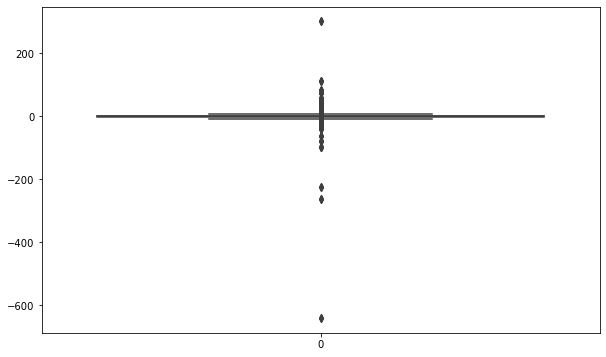

In [175]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ped_hobbies_filtered[0],orient='v')
plt.show()                  

## Calculate PED for foods items

In [3]:
foods_df = pd.read_csv('foods_df.csv')
foods_df =foods_df.drop(foods_df.columns[0],axis=1)
foods_df_2 = foods_df.dropna(subset = ['sell_price'])

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
foods_df_2.head(5)

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,1612,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.00
1,1613,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,7.88
2,1614,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.88
4,1616,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.94
5,1617,FOODS_1_006_CA_1_validation,FOODS_1_006,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.97


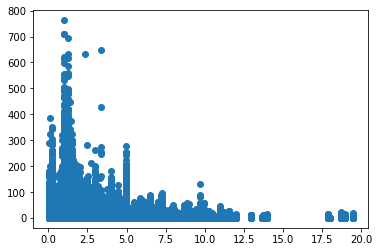

<Figure size 720x432 with 0 Axes>

In [111]:
# We can see the distribution of price and quantity
# when price is low, quantity sold is higher
plt.scatter(foods_df_2['sell_price'],foods_df_2['sold'])
plt.figure(figsize=(10, 6))
plt.show()

In [100]:
# How each specific food items react to price changes.
# Ex: apple in Mcity.
ped_id_food =foods_df_2.groupby('id').apply(calculate_ped)
print(ped_id_food)

id
FOODS_1_001_CA_1_validation   -3.395525
FOODS_1_001_CA_2_validation   -4.022723
FOODS_1_001_CA_3_validation   -1.805704
FOODS_1_001_CA_4_validation   -2.857772
FOODS_1_001_TX_1_validation   -1.110851
                                 ...   
FOODS_3_827_TX_2_validation    1.000000
FOODS_3_827_TX_3_validation   -3.714840
FOODS_3_827_WI_1_validation    1.000000
FOODS_3_827_WI_2_validation    1.000000
FOODS_3_827_WI_3_validation    1.000000
Length: 14370, dtype: float64


In [60]:
# How each type of food item react to price changes.
# Ex: Apple in the whole Australia.
ped_item_id_food =foods_df_2.groupby('item_id').apply(calculate_ped)
print(ped_item_id_food)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


item_id
FOODS_1_001   -3.243099
FOODS_1_002    0.351640
FOODS_1_003   -3.270178
FOODS_1_004   -3.543704
FOODS_1_005    1.188883
                 ...   
FOODS_3_823   -2.578088
FOODS_3_824    1.205180
FOODS_3_825   -5.846464
FOODS_3_826    3.399996
FOODS_3_827   -1.053623
Length: 1437, dtype: float64


In [16]:
# How foods in each state react to price changes.
# Ex: Foods (apple,orange,banana...) in Victoria.
ped_state_item_id_food =foods_df_2.groupby('state_id').apply(calculate_ped)
print(ped_state_item_id_food)

state_id
CA   -0.561844
TX   -0.598503
WI   -0.641968
dtype: float64


In [17]:
# How foods in each store react to price changes.
# Ex: Foods (apple,orange,banana...) in Mcity.
ped_store_item_id_food =foods_df_2.groupby('store_id').apply(calculate_ped)
print(ped_store_item_id_food)

store_id
CA_1   -0.574471
CA_2   -0.508451
CA_3   -0.598783
CA_4   -0.510226
TX_1   -0.601425
TX_2   -0.616935
TX_3   -0.574176
WI_1   -0.585910
WI_2   -0.616041
WI_3   -0.711130
dtype: float64


In [18]:
# How foods in each dept react to price changes.
# Ex: Foods (apple,orange,banana...) in all dept 1,2,3 including all woolies in Aus.
ped_dept_item_id_food =foods_df_2.groupby('dept_id').apply(calculate_ped)
print(ped_dept_item_id_food)

dept_id
FOODS_1   -0.638390
FOODS_2   -0.481386
FOODS_3   -0.594738
dtype: float64


In [65]:
ped_item_store_id_food =foods_df_2.groupby(['item_id','store_id']).apply(calculate_ped)
print(ped_item_store_id_food)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


item_id      store_id
FOODS_1_001  CA_1       -3.395525
             CA_2       -4.022723
             CA_3       -1.805704
             CA_4       -2.857772
             TX_1       -1.110851
                           ...   
FOODS_3_827  TX_2        1.000000
             TX_3       -3.714840
             WI_1        1.000000
             WI_2        1.000000
             WI_3        1.000000
Length: 14370, dtype: float64


In [33]:
ped_item_state_id_food =foods_df_2.groupby(['item_id','state_id']).apply(calculate_ped)
print(ped_item_state_id_food)

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


item_id      state_id
FOODS_1_001  CA         -3.165005
             TX         -2.207560
             WI         -5.316850
FOODS_1_002  CA          0.607149
             TX         -2.417406
                           ...   
FOODS_3_826  TX          3.139472
             WI          1.000000
FOODS_3_827  CA          1.000000
             TX         -7.165047
             WI          1.000000
Length: 4311, dtype: float64


In [61]:
ped_item_id_food = ped_item_id_food.to_frame().reset_index()
ped_item_store_id_food = ped_item_store_id_food.to_frame().reset_index()
ped_item_state_id_food = ped_item_state_id_food.to_frame().reset_index().reset_index()

In [90]:
ped_item_store_id_food['state_id'] = ped_item_store_id_food['store_id'].str[:2]

In [176]:
a_foods = ped_item_id_food.merge(ped_item_state_id_food,left_on ='item_id',right_on = 'item_id')

In [177]:
b_foods = a_foods.merge(ped_item_store_id_food,left_on =['item_id','state_id'],right_on = ['item_id','state_id'])

In [178]:
b_foods

,item_id,0_x,state_id,0_y,store_id,0
0,FOODS_1_001,-3.243099,CA,-3.165005,CA_1,-3.395525
1,FOODS_1_001,-3.243099,CA,-3.165005,CA_2,-4.022723
2,FOODS_1_001,-3.243099,CA,-3.165005,CA_3,-1.805704
3,FOODS_1_001,-3.243099,CA,-3.165005,CA_4,-2.857772
4,FOODS_1_001,-3.243099,TX,-2.207560,TX_1,-1.110851
...,...,...,...,...,...,...
14365,FOODS_3_827,-1.053623,TX,-7.165047,TX_2,1.000000
14366,FOODS_3_827,-1.053623,TX,-7.165047,TX_3,-3.714840
14367,FOODS_3_827,-1.053623,WI,1.000000,WI_1,1.000000
14368,FOODS_3_827,-1.053623,WI,1.000000,WI_2,1.000000


In [183]:
ped_hobbies_filtered = b_foods[(b_foods[0] < 100) & (b_foods[0] > -100)]

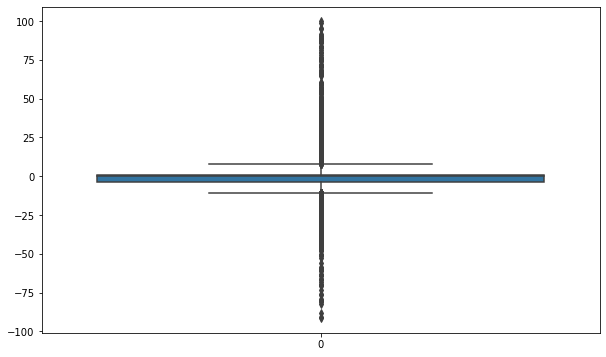

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = ped_hobbies_filtered[0],orient='v')
plt.show()        

## Caculate PED for households items

In [185]:
households_df = pd.read_csv('households.csv')
households_df = households_df.drop(households_df.columns[0],axis=1)
households_df = households_df.dropna(subset = ['sell_price'])

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


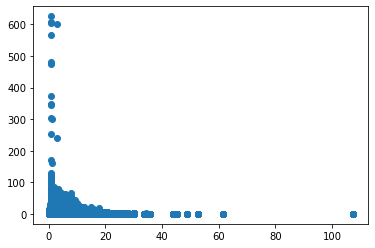

<Figure size 720x432 with 0 Axes>

In [187]:
# We can see the distribution of price and quantity
# when price is low, quantity sold is higher
plt.scatter(households_df['sell_price'],households_df['sold'])
plt.figure(figsize=(10, 6))
plt.show()

In [189]:
# How each specific food items react to price changes.
# Ex: apple in Mcity.
ped_id_households = households_df.groupby('id').apply(calculate_ped)
print(ped_id_households)

id
HOUSEHOLD_1_001_CA_1_validation    -0.994784
HOUSEHOLD_1_001_CA_2_validation    10.577096
HOUSEHOLD_1_001_CA_3_validation     3.494343
HOUSEHOLD_1_001_CA_4_validation     0.134957
HOUSEHOLD_1_001_TX_1_validation    -2.200022
                                     ...    
HOUSEHOLD_2_516_TX_2_validation    -5.833195
HOUSEHOLD_2_516_TX_3_validation     1.000000
HOUSEHOLD_2_516_WI_1_validation     1.000000
HOUSEHOLD_2_516_WI_2_validation     1.000000
HOUSEHOLD_2_516_WI_3_validation     1.000000
Length: 10470, dtype: float64


In [191]:
# How each type of food item react to price changes.
# Ex: Apple in the whole Australia.
ped_item_id_households = households_df.groupby('item_id').apply(calculate_ped)
print(ped_item_id_households)

item_id
HOUSEHOLD_1_001     1.609250
HOUSEHOLD_1_002    -0.215320
HOUSEHOLD_1_003     1.000000
HOUSEHOLD_1_004     2.252436
HOUSEHOLD_1_005    -1.558920
                     ...    
HOUSEHOLD_2_512     0.330760
HOUSEHOLD_2_513     1.000000
HOUSEHOLD_2_514     2.109435
HOUSEHOLD_2_515    -0.136487
HOUSEHOLD_2_516   -13.006727
Length: 1047, dtype: float64


In [192]:
# How foods in each state react to price changes.
# Ex: Foods (apple,orange,banana...) in Victoria.
ped_state_item_id_households = households_df.groupby('state_id').apply(calculate_ped)
print(ped_state_item_id_households)

state_id
CA   -0.672693
TX   -0.835770
WI   -0.861048
dtype: float64


In [193]:
# How foods in each store react to price changes.
# Ex: Foods (apple,orange,banana...) in Mcity.
ped_store_item_id_households = households_df.groupby('store_id').apply(calculate_ped)
print(ped_store_item_id_households)

store_id
CA_1   -0.639014
CA_2   -0.577400
CA_3   -0.770494
CA_4   -0.576431
TX_1   -0.859197
TX_2   -0.786838
TX_3   -0.866839
WI_1   -0.755076
WI_2   -0.958233
WI_3   -0.835668
dtype: float64


In [194]:
# How foods in each dept react to price changes.
# Ex: Foods (apple,orange,banana...) in all dept 1,2,3 including all woolies in Aus.
ped_dept_item_id_households = households_df.groupby('dept_id').apply(calculate_ped)
print(ped_dept_item_id_households)

dept_id
HOUSEHOLD_1   -0.567125
HOUSEHOLD_2   -0.575657
dtype: float64


In [195]:
ped_item_store_id_households = households_df.groupby(['item_id','store_id']).apply(calculate_ped)
print(ped_item_store_id_households)

item_id          store_id
HOUSEHOLD_1_001  CA_1        -0.994784
                 CA_2        10.577096
                 CA_3         3.494343
                 CA_4         0.134957
                 TX_1        -2.200022
                               ...    
HOUSEHOLD_2_516  TX_2        -5.833195
                 TX_3         1.000000
                 WI_1         1.000000
                 WI_2         1.000000
                 WI_3         1.000000
Length: 10470, dtype: float64


In [196]:
ped_item_state_id_households = households_df.groupby(['item_id','state_id']).apply(calculate_ped)
print(ped_item_state_id_households)

item_id          state_id
HOUSEHOLD_1_001  CA           2.890141
                 TX           0.748463
                 WI          -0.671808
HOUSEHOLD_1_002  CA           0.789803
                 TX           1.240118
                               ...    
HOUSEHOLD_2_515  TX          -0.268551
                 WI           1.000000
HOUSEHOLD_2_516  CA           1.000000
                 TX         -10.051395
                 WI           1.000000
Length: 3141, dtype: float64


In [197]:
ped_item_id_households = ped_item_id_households.to_frame().reset_index()
ped_item_store_id_households = ped_item_store_id_households.to_frame().reset_index()
ped_item_state_id_households = ped_item_state_id_households.to_frame().reset_index().reset_index()

In [198]:
ped_item_store_id_households['state_id'] = ped_item_store_id_households['store_id'].str[:2]

In [199]:
a_households = ped_item_id_households.merge(ped_item_state_id_households,left_on ='item_id',right_on = 'item_id')
b_households = a_households.merge(ped_item_store_id_households,left_on =['item_id','state_id'],right_on = ['item_id','state_id'])

In [201]:
b_households.to_csv('households_ped.csv')